# Agregacion de datos por categoria

In [59]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
gender = ["Male","Female"]
income = ["Poor","Middle Class","Rich"]

In [7]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [10]:
gender_data[1:10]

['Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female']

In [9]:
income_data[1:10]

['Rich',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Rich',
 'Rich']

z -> N(0,1)

N(m.s) -> m + s * z

In [19]:
#z -> N(0,1)

#N(m.s) -> m + s * z

height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [22]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height.astype(int),
        "Weight": weight.astype(int),
        "Age": age.astype(int),
        "Income": income
    }
)

In [23]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,209,80,33,19736.906669
1,Male,Rich,169,74,28,19422.953467
2,Male,Poor,173,74,34,16153.546696
3,Female,Rich,144,41,23,15872.800361
4,Male,Middle Class,183,74,35,21716.649709


## Agrupacion de datos

In [25]:
grouped_gender = data.groupby("Gender")

In [31]:
grouped_gender.groups


{'Female': [0, 3, 9, 11, 13, 15, 16, 18, 19, 20, 26, 28, 30, 31, 32, 33, 34, 35, 39, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 60, 63, 65, 71, 72, 73, 76, 79, 80, 81, 91, 92, 94, 100, 101, 106, 107, 108, 109, 110, 111, 112, 115, 116, 117, 121, 122, 124, 126, 127, 131, 133, 137, 138, 139, 141, 142, 144, 148, 149, 150, 152, 153, 154, 155, 157, 159, 160, 163, 165, 166, 172, 173, 177, 181, 184, 186, 187, 188, 189, 191, 194, 196, 199, 200, 203, 204, 205, ...], 'Male': [1, 2, 4, 5, 6, 7, 8, 10, 12, 14, 17, 21, 22, 23, 24, 25, 27, 29, 36, 37, 38, 40, 41, 42, 44, 56, 58, 59, 61, 62, 64, 66, 67, 68, 69, 70, 74, 75, 77, 78, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 95, 96, 97, 98, 99, 102, 103, 104, 105, 113, 114, 118, 119, 120, 123, 125, 128, 129, 130, 132, 134, 135, 136, 140, 143, 145, 146, 147, 151, 156, 158, 161, 162, 164, 167, 168, 169, 170, 171, 174, 175, 176, 178, 179, 180, 182, 183, 185, 190, 192, ...]}

In [32]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status  Height  Weight  Age        Income
0    Female    Middle Class     209      80   33  19736.906669
3    Female            Rich     144      41   23  15872.800361
9    Female            Rich     106      77   13  21585.943600
11   Female            Poor     224       0    5  15683.309168
13   Female            Rich     174      86   57  19211.823641
..      ...             ...     ...     ...  ...           ...
489  Female    Middle Class     160     104   16  13823.415219
491  Female            Rich     110      65   52  22589.702187
492  Female            Poor     142      96   20  18981.963244
495  Female            Poor     169      59   41  19624.296511
497  Female            Poor     176      76   41  22903.989250

[240 rows x 6 columns]
Male
    Gender Economic Status  Height  Weight  Age        Income
1     Male            Rich     169      74   28  19422.953467
2     Male            Poor     173      74   34  16153.546696
4     Male    Middle C

In [34]:
grouped_gender.get_group("Female").head(10)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,209,80,33,19736.906669
3,Female,Rich,144,41,23,15872.800361
9,Female,Rich,106,77,13,21585.943600
11,Female,Poor,224,0,5,15683.309168
13,Female,Rich,174,86,57,19211.823641
15,Female,Middle Class,116,94,43,19261.490097
16,Female,Middle Class,152,89,40,12658.834097
18,Female,Poor,131,65,24,12504.813917
19,Female,Poor,157,31,38,18127.252513
20,Female,Middle Class,139,97,39,14954.185817


In [35]:
double_group = data.groupby(["Gender","Economic Status"])

In [36]:
len(double_group)

6

In [41]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status  Height  Weight  Age        Income
0    Female    Middle Class     209      80   33  19736.906669
15   Female    Middle Class     116      94   43  19261.490097
16   Female    Middle Class     152      89   40  12658.834097
20   Female    Middle Class     139      97   39  14954.185817
28   Female    Middle Class     154      75   15  13321.775720
..      ...             ...     ...     ...  ...           ...
466  Female    Middle Class     176      80   35  23655.420941
468  Female    Middle Class     202      53   48  17756.927093
472  Female    Middle Class     185      66   44  11341.464383
477  Female    Middle Class     210      11   30  18303.342465
489  Female    Middle Class     160     104   16  13823.415219

[87 rows x 6 columns]


TypeError: 'NoneType' object is not subscriptable

## Operaciones sobre datos agrupados

In [42]:
double_group.sum()

Height  Weight   Age        Income
Gender Economic Status                                    
Female Middle Class      14353    5232  2899  1.542376e+06
       Poor              11490    4647  2069  1.366327e+06
       Rich              12594    5155  2434  1.489117e+06
Male   Middle Class      13851    5790  2513  1.565847e+06
       Poor              13146    5293  2232  1.460538e+06
       Rich              15008    6259  2767  1.691182e+06

In [43]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     164.977011  60.137931  33.321839  17728.457811
       Poor             157.397260  63.657534  28.342466  18716.804758
       Rich             157.425000  64.437500  30.425000  18613.964604
Male   Middle Class     157.397727  65.795455  28.556818  17793.713402
       Poor             164.325000  66.162500  27.900000  18256.726334
       Rich             163.130435  68.032609  30.076087  18382.416388

In [44]:
double_group.size()

Gender  Economic Status
Female  Middle Class       87
        Poor               73
        Rich               80
Male    Middle Class       88
        Poor               80
        Rich               92
dtype: int64

In [45]:
double_group.describe()

Height                                              \
                        count        mean        std   min     25%    50%   
Gender Economic Status                                                      
Female Middle Class      87.0  164.977011  31.794389  77.0  142.00  164.0   
       Poor              73.0  157.397260  34.285865  80.0  135.00  159.0   
       Rich              80.0  157.425000  32.503466  84.0  135.75  158.5   
Male   Middle Class      88.0  157.397727  29.162856  92.0  136.50  157.5   
       Poor              80.0  164.325000  30.358939  92.0  146.00  164.0   
       Rich              92.0  163.130435  29.935174  92.0  143.25  165.5   

                                      Weight             ...   Age        \
                           75%    max  count       mean  ...   75%   max   
Gender Economic Status                                   ...               
Female Middle Class     191.00  217.0   87.0  60.137931  ...  41.5  62.0   
       Poor             180.00  242.0   73.0  63.657534  ...  37.0  48.0   
       Rich             181.50  230.0   80.0  64.437500  ...  40.0  63.0   
Male   Middle Class     179.00  217.0   88.0  65.795455  ...  36.0  65.0   
       Poor             179.00  232.0   80.0  66.162500  ...  37.0  52.0   
       Rich             179.25  229.0   92.0  68.032609  ...  38.0  59.0   

                       Income                                           \
                        count          mean          std           min   
Gender Economic Status                                                   
Female Middle Class      87.0  17728.457811  3006.046576  11341.464383   
       Poor              73.0  18716.804758  3719.431465  10996.780075   
       Rich              80.0  18613.964604  3353.950509  10802.094826   
Male   Middle Class      88.0  17793.713402  3295.750272  11998.610693   
       Poor              80.0  18256.726334  2976.581415  11554.174021   
       Rich              92.0  18382.416388  3584.240509   9630.835320   

                                                                                
                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15643.376730  17827.034578  19542.391114  25184.608438  
       Poor             15773.908976  18759.893323  21560.147407  26331.145020  
       Rich             16166.418522  18665.809685  20726.477498  27051.801659  
Male   Middle Class     15513.497051  17699.988486  20332.584025  26757.060702  
       Poor             16122.069258  17738.916024  20229.314703  25548.970786  
       Rich             15991.207328  18283.008226  20591.558168  27644.088841  

[6 rows x 32 columns]

In [48]:
grouped_income = double_group["Income"]

In [49]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      87.0  17728.457811  3006.046576  11341.464383   
       Poor              73.0  18716.804758  3719.431465  10996.780075   
       Rich              80.0  18613.964604  3353.950509  10802.094826   
Male   Middle Class      88.0  17793.713402  3295.750272  11998.610693   
       Poor              80.0  18256.726334  2976.581415  11554.174021   
       Rich              92.0  18382.416388  3584.240509   9630.835320   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     15643.376730  17827.034578  19542.391114  25184.608438  
       Poor             15773.908976  18759.893323  21560.147407  26331.145020  
       Rich             16166.418522  18665.809685  20726.477498  27051.801659  
Male   Middle Class     15513.497051  17699.988486  20332.584025  26757.060702  
       Poor             16122.069258  17738.916024  20229.314703  25548.970786  
       Rich             15991.207328  18283.008226  20591.558168  27644.088841

In [50]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }

)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.542376e+06  33.321839  31.794389
       Poor             1.366327e+06  28.342466  34.285865
       Rich             1.489117e+06  30.425000  32.503466
Male   Middle Class     1.565847e+06  28.556818  29.162856
       Poor             1.460538e+06  27.900000  30.358939
       Rich             1.691182e+06  30.076087  29.935174

In [51]:
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h:np.mean(h)/np.std(h) 
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     33.321839  5.218953
       Poor             28.342466  4.622503
       Rich             30.425000  4.873887
Male   Middle Class     28.556818  5.428128
       Poor             27.900000  5.446889
       Rich             30.076087  5.479317

In [52]:
double_group.aggregate([np.sum, np.mean, np.std]) # Se aplican a todas las variables

Height                        Weight             \
                          sum        mean        std    sum       mean   
Gender Economic Status                                                   
Female Middle Class     14353  164.977011  31.794389   5232  60.137931   
       Poor             11490  157.397260  34.285865   4647  63.657534   
       Rich             12594  157.425000  32.503466   5155  64.437500   
Male   Middle Class     13851  157.397727  29.162856   5790  65.795455   
       Poor             13146  164.325000  30.358939   5293  66.162500   
       Rich             15008  163.130435  29.935174   6259  68.032609   

                                    Age                              Income  \
                              std   sum       mean        std           sum   
Gender Economic Status                                                        
Female Middle Class     26.125000  2899  33.321839  11.470381  1.542376e+06   
       Poor             26.330812  2069  28.342466  11.194268  1.366327e+06   
       Rich             21.832993  2434  30.425000  13.068248  1.489117e+06   
Male   Middle Class     25.516350  2513  28.556818  10.348922  1.565847e+06   
       Poor             28.114794  2232  27.900000  11.355699  1.460538e+06   
       Rich             23.563079  2767  30.076087  12.378849  1.691182e+06   

                                                   
                                mean          std  
Gender Economic Status                             
Female Middle Class     17728.457811  3006.046576  
       Poor             18716.804758  3719.431465  
       Rich             18613.964604  3353.950509  
Male   Middle Class     17793.713402  3295.750272  
       Poor             18256.726334  2976.581415  
       Rich             18382.416388  3584.240509

In [53]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     5.218953  2.315275  2.921874  5.931788
       Poor             4.622503  2.434337  2.549395  5.066993
       Rich             4.873887  2.970003  2.342851  5.584878
Male   Middle Class     5.428128  2.593338  2.775214  5.429927
       Poor             5.446889  2.368146  2.472417  6.172152
       Rich             5.479317  2.903075  2.442948  5.156781

## Filtrado de datos

In [54]:
double_group.sum()

Height  Weight   Age        Income
Gender Economic Status                                    
Female Middle Class      14353    5232  2899  1.542376e+06
       Poor              11490    4647  2069  1.366327e+06
       Rich              12594    5155  2434  1.489117e+06
Male   Middle Class      13851    5790  2513  1.565847e+06
       Poor              13146    5293  2232  1.460538e+06
       Rich              15008    6259  2767  1.691182e+06

In [55]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      33
1      28
3      23
4      35
5      16
       ..
491    52
493    27
494    36
498    31
499    46
Name: Age, Length: 347, dtype: int64

## Transformacion de Variables

In [57]:
zscore = lambda x : (x - x.mean()/x.std())

In [60]:
z_group = double_group.transform(zscore) # Transform - funcion util en muchos casos

(array([  6.,  26.,  39.,  96., 104.,  98.,  83.,  30.,  12.,   6.]),
 array([-5.531873  ,  1.24537427,  8.02262154, 14.79986881, 21.57711607,
        28.35436334, 35.13161061, 41.90885788, 48.68610514, 55.46335241,
        62.24059968]),
 <BarContainer object of 10 artists>)

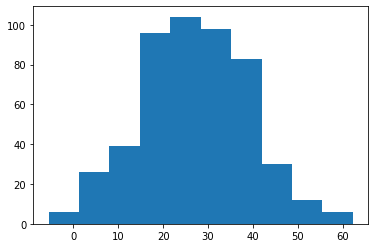

In [61]:
plt.hist(z_group["Age"])

In [62]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [63]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,209,80,33,19736.906669
1,169,74,28,19422.953467
2,173,74,34,16153.546696
3,144,41,23,15872.800361
4,183,74,35,21716.649709
...,...,...,...,...
495,169,59,41,19624.296511
496,171,29,21,17185.745862
497,176,76,41,22903.989250
498,131,83,31,20117.058994


## Operaciones diversas muy utiles

In [64]:
double_group.head(1) # La primer ocurrencia de cada uno de los grupos

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middle Class,209,80,33,19736.906669
1,Male,Rich,169,74,28,19422.953467
2,Male,Poor,173,74,34,16153.546696
3,Female,Rich,144,41,23,15872.800361
4,Male,Middle Class,183,74,35,21716.649709
11,Female,Poor,224,0,5,15683.309168


In [65]:
double_group.tail(1) #La ultima ocurrencia de cada grupo

,Gender,Economic Status,Height,Weight,Age,Income
489,Female,Middle Class,160,104,16,13823.415219
491,Female,Rich,110,65,52,22589.702187
494,Male,Middle Class,179,93,36,12962.962584
496,Male,Poor,171,29,21,17185.745862
497,Female,Poor,176,76,41,22903.989250
499,Male,Rich,209,63,46,25717.981985


In [67]:
double_group.nth(32) # Elemento 32 de cada una de las filas

Height  Weight  Age        Income
Gender Economic Status                                   
Female Middle Class        178     103   43  19965.580672
       Poor                179      60   13  19209.136609
       Rich                125      15   35  14849.208663
Male   Middle Class        173      49   29  18274.767976
       Poor                170     118    9  19627.567073
       Rich                115     100   41  14120.637677

In [68]:
double_group.nth(82) # Falta informacion porque la posicion 82 no existe en algunos

Height  Weight  Age        Income
Gender Economic Status                                   
Female Middle Class        176      80   35  23655.420941
Male   Middle Class        175      19   34  15361.844358
       Rich                175      71   48  12118.270194

In [69]:
data_sorted = data.sort_values(["Age","Income"])

In [70]:
data_sorted.head(20)

,Gender,Economic Status,Height,Weight,Age,Income
264,Female,Poor,177,80,-3,19719.844014
481,Male,Poor,92,40,0,17660.598552
479,Female,Rich,209,88,1,22558.769883
97,Male,Rich,216,54,3,14974.430651
38,Male,Poor,131,87,3,18795.890100
113,Male,Rich,224,74,3,22648.966073
59,Male,Rich,166,80,4,19632.915878
11,Female,Poor,224,0,5,15683.309168
256,Male,Rich,153,66,5,17706.724711
49,Female,Rich,97,59,5,19540.140509


In [71]:
age_grouped = data_sorted.groupby("Gender")

In [72]:
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
264,Female,Poor,177,80,-3,19719.844014
481,Male,Poor,92,40,0,17660.598552
479,Female,Rich,209,88,1,22558.769883
97,Male,Rich,216,54,3,14974.430651
38,Male,Poor,131,87,3,18795.890100
113,Male,Rich,224,74,3,22648.966073
59,Male,Rich,166,80,4,19632.915878
11,Female,Poor,224,0,5,15683.309168
49,Female,Rich,97,59,5,19540.140509
172,Female,Rich,198,93,7,18443.202822


In [73]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
72,Female,Rich,158,92,63,17331.359605
74,Male,Middle Class,192,69,65,20995.293151


In [74]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
264,Female,Poor,177,80,-3,19719.844014
481,Male,Poor,92,40,0,17660.598552
